In [1]:
def insertion_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the insertion sort algorithm.
    
    Args:
        arr (list[int]): The array to be sorted.
        
    Returns:
        list[int]: The sorted array.
    """
    # Check if the array is already sorted
    if all(arr[i] <= arr[i + 1] for i in range(len(arr) - 1)):
        return arr
    
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        
        # Move elements of arr[0..i-1], that are greater than key, to one position ahead
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        
        # Place the key at the correct position
        arr[j + 1] = key
    
    return arr



In [2]:
def bubble_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the optimized bubble sort algorithm.
    
    Args:
        arr (list[int]): The array to be sorted.
        
    Returns:
        list[int]: The sorted array.
    """
    n = len(arr)

    # Early exit if the array is already sorted
    if all(arr[i] <= arr[i + 1] for i in range(n - 1)):
        return arr

    for i in range(n):
        swapped = False
        # Track the last swapped index to avoid unnecessary comparisons
        last_swapped = n - 1
        for j in range(0, last_swapped - i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
                last_swapped = j  # Update the last swapped index

        # If no elements were swapped, the array is already sorted
        if not swapped:
            break

    return arr



In [3]:
def selection_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the selection sort algorithm.
    
    Args:
        arr (list[int]): The array to be sorted.
        
    Returns:
        list[int]: The sorted array.
    """
    n = len(arr)

    # Early exit if the array is already sorted
    if all(arr[i] <= arr[i + 1] for i in range(n - 1)):
        return arr

    for i in range(n):
        # Find the minimum element in the unsorted portion of the array
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        
        # Swap only if the minimum index has changed
        if min_idx != i:
            arr[i], arr[min_idx] = arr[min_idx], arr[i]

    return arr



In [4]:
def merge_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the merge sort algorithm.
    
    Args:
        arr (list[int]): The array to be sorted.
        
    Returns:
        list[int]: The sorted array.
    """
    # Base case: If array has only one element, it's already sorted
    if len(arr) <= 1:
        return arr

    # Check if the array is already sorted
    if all(arr[i] <= arr[i + 1] for i in range(len(arr) - 1)):
        return arr

    # Split the array into two halves
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    # Recursive calls to sort both halves
    merge_sort(left_half)
    merge_sort(right_half)

    i = j = k = 0

    # Merging the sorted halves
    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            arr[k] = left_half[i]
            i += 1
        else:
            arr[k] = right_half[j]
            j += 1
        k += 1

    # Copy any remaining elements from the left half
    while i < len(left_half):
        arr[k] = left_half[i]
        i += 1
        k += 1

    # Copy any remaining elements from the right half
    while j < len(right_half):
        arr[k] = right_half[j]
        j += 1
        k += 1

    return arr



In [5]:
def quick_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the quick sort algorithm.
    
    Args:
        arr (list[int]): The array to be sorted.
        
    Returns:
        list[int]: The sorted array.
    """
    def _quick_sort(arr, low, high):
        if low < high:
            # Partition the array and get the pivot index
            pi = partition(arr, low, high)
            
            # Recursively sort the left and right subarrays
            _quick_sort(arr, low, pi - 1)
            _quick_sort(arr, pi + 1, high)

    def partition(arr, low, high):
        pivot = arr[high]  # Taking the last element as the pivot
        i = low - 1  # Index of the smaller element

        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]  # Swap

        arr[i + 1], arr[high] = arr[high], arr[i + 1]  # Swap pivot to its correct place
        return i + 1

    # Call the helper function with initial low and high values
    _quick_sort(arr, 0, len(arr) - 1)
    return arr



In [7]:
def heapify(arr: list[int], n: int, i: int) -> None:
    """
    Ensures the subtree rooted at index i follows the heap property.
    
    Args:
        arr (list[int]): The array representing the heap.
        n (int): The size of the heap.
        i (int): The index of the root element of the subtree.
    """
    largest = i  # Initialize largest as root
    left = 2 * i + 1  # Left child index
    right = 2 * i + 2  # Right child index

    # Check if left child exists and is greater than the root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Check if right child exists and is greater than the largest found so far
    if right < n and arr[right] > arr[largest]:
        largest = right

    # If the largest is not the root, swap and continue heapifying
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        heapify(arr, n, largest)  # Recursively heapify the affected subtree

def heap_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the heap sort algorithm.
    
    Args:
        arr (list[int]): The array to be sorted.
        
    Returns:
        list[int]: The sorted array.
    """
    n = len(arr)

    # Early exit for empty array
    if n == 0:
        return arr

    # Build a max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # One by one extract elements from the heap
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Move current root to end
        heapify(arr, i, 0)  # Call heapify on the reduced heap

    return arr



In [9]:
def counting_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the counting sort algorithm.

    Args:
        arr (list[int]): The array to be sorted.

    Returns:
        list[int]: The sorted array.
    """
    # Early exit for empty array
    if not arr:
        return arr

    max_val = max(arr)
    min_val = min(arr)
    range_of_elements = max_val - min_val + 1

    # Create count array and initialize it to 0
    count = [0] * range_of_elements

    # Count the occurrences of each element
    for num in arr:
        count[num - min_val] += 1

    # Update count array to store cumulative counts
    for i in range(1, len(count)):
        count[i] += count[i - 1]

    # Create a sorted output array
    output = [0] * len(arr)

    # Build the output array in reverse order to maintain stability
    for i in range(len(arr) - 1, -1, -1):
        output[count[arr[i] - min_val] - 1] = arr[i]
        count[arr[i] - min_val] -= 1

    # Copy the sorted output array back to the original array
    for i in range(len(arr)):
        arr[i] = output[i]

    return arr



In [10]:
def counting_sort_for_radix(arr: list[int], exp: int) -> None:
    """
    A stable counting sort function that sorts the array based on the digit represented by exp.

    Args:
        arr (list[int]): The array to be sorted.
        exp (int): The exponent representing the digit place (1 for units, 10 for tens, etc.).
    """
    n = len(arr)
    output = [0] * n  # Output array to store sorted values
    count = [0] * 10  # Count array for digits (0-9)

    # Count occurrences of each digit
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    # Update count array to store cumulative counts
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array in reverse order to maintain stability
    for i in range(n - 1, -1, -1):
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1

    # Copy the output array back to the original array
    for i in range(n):
        arr[i] = output[i]


def radix_sort(arr: list[int]) -> list[int]:
    """
    Sorts an array using the radix sort algorithm.

    Args:
        arr (list[int]): The array to be sorted.

    Returns:
        list[int]: The sorted array.
    """
    # Early exit for empty array
    if not arr:
        return arr

    max_val = max(arr)  # Find the maximum value to know the number of digits
    exp = 1  # Start with the least significant digit

    # Perform counting sort for each digit
    while max_val // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10  # Move to the next significant digit

    return arr



In [11]:
def bucket_sort(arr):
    if len(arr) == 0:
        return arr

    # Create n empty buckets
    bucket_count = len(arr)
    buckets = [[] for _ in range(bucket_count)]

    # Put array elements in different buckets
    for num in arr:
        # Ensure that 1.0 falls into the last bucket
        index = min(int(num * bucket_count), bucket_count - 1)
        buckets[index].append(num)

    # Sort individual buckets
    for bucket in buckets:
        bucket.sort()

    # Concatenate all sorted buckets
    sorted_arr = []
    for bucket in buckets:
        sorted_arr.extend(bucket)

    return sorted_arr


In [12]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def measure_sorting_algorithms(sort_funcs, array_sizes, num_trials=3):
    results = {func.__name__: [] for func in sort_funcs}

    for size in array_sizes:
        print(f"Measuring array size: {size}")
        # Generate a random array of the given size
        base_array = [random.randint(0, size) for _ in range(size)]
        
        for func in sort_funcs:
            total_time = 0.0
            for trial in range(num_trials):
                # Make a copy of the array to sort
                arr = base_array.copy()
                start_time = time.time()
                func(arr)
                end_time = time.time()
                total_time += (end_time - start_time)
            average_time = total_time / num_trials
            results[func.__name__].append(average_time)
            print(f"  {func.__name__}: {average_time:.6f} seconds")
    
    return results



Measuring array size: 100
  insertion_sort: 0.446667 milliseconds
  bubble_sort: 1.337200 milliseconds
  selection_sort: 1.986600 milliseconds
  merge_sort: 1.083333 milliseconds
  quick_sort: 0.307033 milliseconds
  heap_sort: 0.416800 milliseconds
  counting_sort: 0.151400 milliseconds
  radix_sort: 0.451700 milliseconds
  bucket_sort: 0.121533 milliseconds

Measuring array size: 500
  insertion_sort: 11.862533 milliseconds
  bubble_sort: 17.305900 milliseconds
  selection_sort: 6.144233 milliseconds
  merge_sort: 1.114267 milliseconds
  quick_sort: 0.492733 milliseconds
  heap_sort: 1.063800 milliseconds
  counting_sort: 0.174167 milliseconds
  radix_sort: 0.528167 milliseconds
  bucket_sort: 0.246667 milliseconds

Measuring array size: 1000
  insertion_sort: 20.960233 milliseconds
  bubble_sort: 105.373733 milliseconds
  selection_sort: 21.804233 milliseconds
  merge_sort: 2.150667 milliseconds
  quick_sort: 1.062667 milliseconds
  heap_sort: 2.409833 milliseconds
  counting_sort:

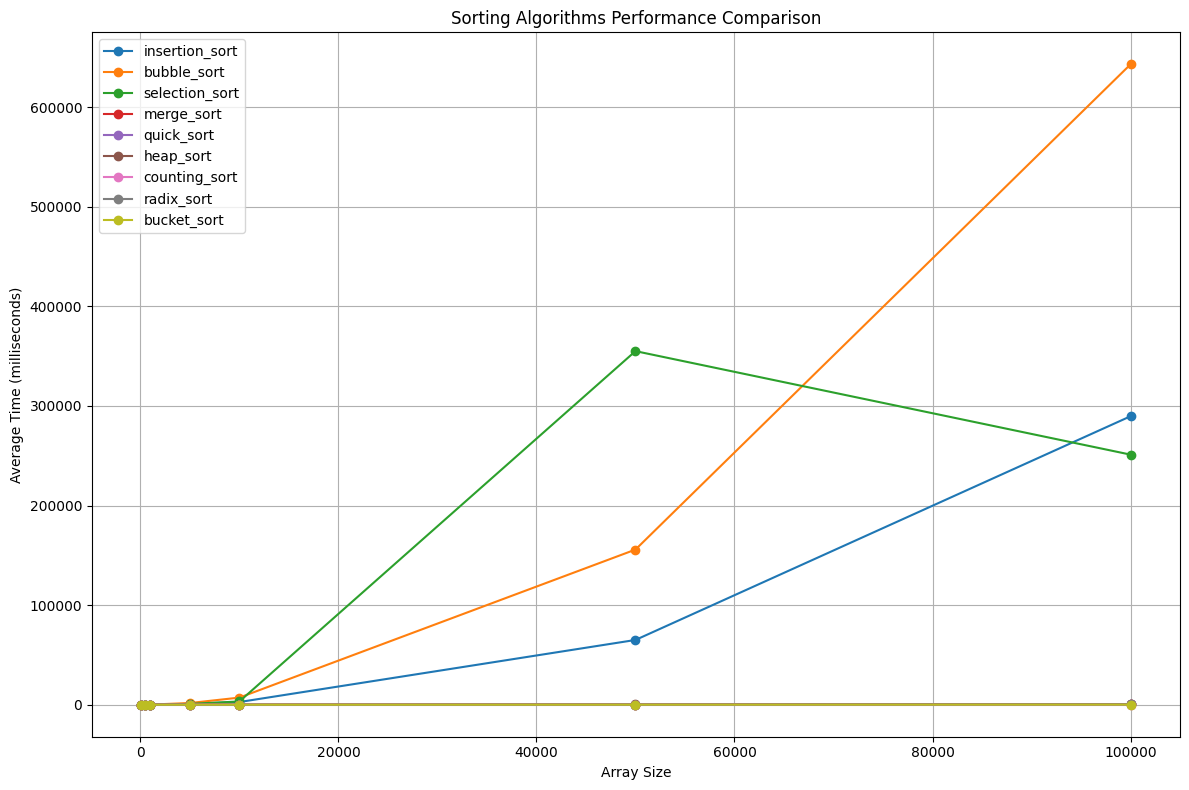

In [13]:
import random
import time
import matplotlib.pyplot as plt

def measure_sorting_algorithms(sort_funcs, array_sizes, num_trials=3):
    results = {func.__name__: [] for func in sort_funcs}

    for size in array_sizes:
        print(f"\nMeasuring array size: {size}")
        # Generate a random array of the given size
        base_array = [random.randint(0, size) for _ in range(size)]
        
        for func in sort_funcs:
            total_time = 0.0
            for trial in range(num_trials):
                # Make a copy of the array to sort
                arr = base_array.copy()
                start_time = time.perf_counter()
                func(arr)
                end_time = time.perf_counter()
                total_time += (end_time - start_time)
            average_time = (total_time / num_trials) * 1000  # Convert seconds to milliseconds
            results[func.__name__].append(average_time)
            print(f"  {func.__name__}: {average_time:.6f} milliseconds")
    
    return results

if __name__ == "__main__":
    # List of all nine sorting algorithms
    sorting_algorithms = [
        insertion_sort, 
        bubble_sort, 
        selection_sort,
        merge_sort, 
        quick_sort, 
        heap_sort,
        counting_sort, 
        radix_sort, 
        bucket_sort
    ]

    # Define the array sizes in ascending order
    # Adjust the maximum size based on your system's capabilities
    array_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

    # Measure the sorting algorithms
    results = measure_sorting_algorithms(sorting_algorithms, array_sizes, num_trials=3)

    # Plot the results
    plt.figure(figsize=(12, 8))
    for sort_name, times in results.items():
        plt.plot(array_sizes, times, marker='o', label=sort_name)
    
    plt.xlabel('Array Size')
    plt.ylabel('Average Time (milliseconds)')
    plt.title('Sorting Algorithms Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
